In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/Users/vimu/Documents/Data Science/SDS/Github/TimeSeriesAnalysis/Data/Energy_consumption.csv',index_col= "Timestamp",parse_dates=True)

In [8]:
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [9]:
df.tail()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Saturday,No,82.306692
2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,Off,On,25.748176,Tuesday,Yes,66.577320
2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471
2022-02-11 14:00:00,25.138365,31.306459,1309.079719,3,On,Off,20.425163,Thursday,Yes,76.950389
2022-02-11 15:00:00,23.051165,42.615421,1018.140606,6,Off,On,2.455657,Saturday,No,71.545311


In [11]:
df.loc['2022-02-11 14:00:00']

Temperature            25.138365
Humidity               31.306459
SquareFootage        1309.079719
Occupancy                      3
HVACUsage                     On
LightingUsage                Off
RenewableEnergy        20.425163
DayOfWeek               Thursday
Holiday                      Yes
EnergyConsumption      76.950389
Name: 2022-02-11 14:00:00, dtype: object

In [12]:
print(df.index)
print(df.index.dtype)

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-02-11 06:00:00', '2022-02-11 07:00:00',
               '2022-02-11 08:00:00', '2022-02-11 09:00:00',
               '2022-02-11 10:00:00', '2022-02-11 11:00:00',
               '2022-02-11 12:00:00', '2022-02-11 13:00:00',
               '2022-02-11 14:00:00', '2022-02-11 15:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=1000, freq=None)
datetime64[ns]


In [13]:
# Check time difference between consecutive rows
time_diffs = df.index.to_series().diff()
print(time_diffs.value_counts())

Timestamp
0 days 01:00:00    999
Name: count, dtype: int64


In [14]:
print("Start Date:", df.index.min())
print("End Date:", df.index.max())
print("Total Duration:", df.index.max() - df.index.min())
print("Total Hours:", len(df))

Start Date: 2022-01-01 00:00:00
End Date: 2022-02-11 15:00:00
Total Duration: 41 days 15:00:00
Total Hours: 1000


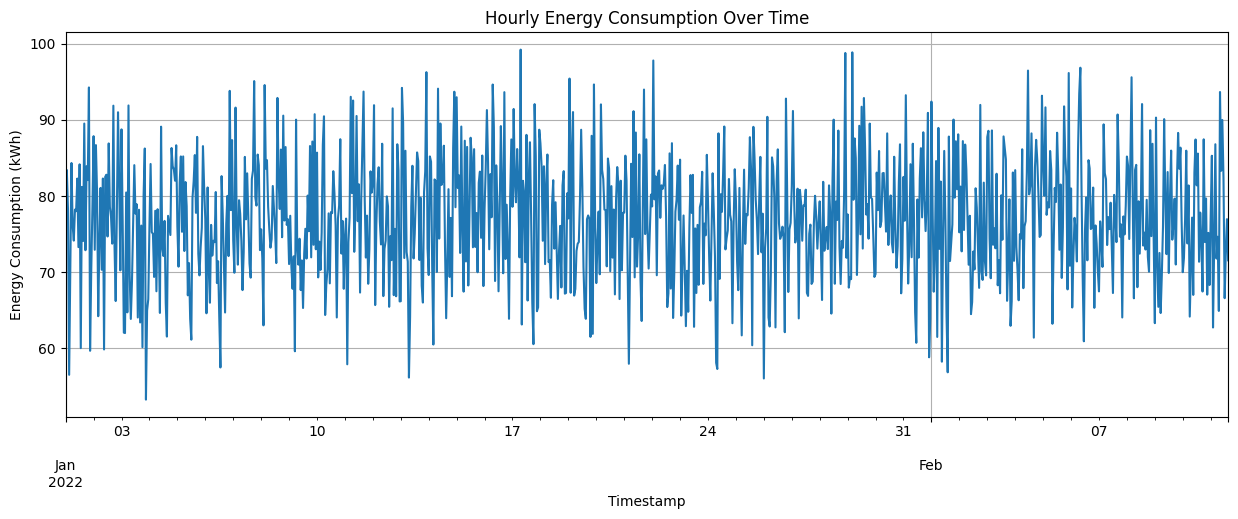

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
df['EnergyConsumption'].plot(title='Hourly Energy Consumption Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (kWh)')
plt.grid(True)
plt.show()

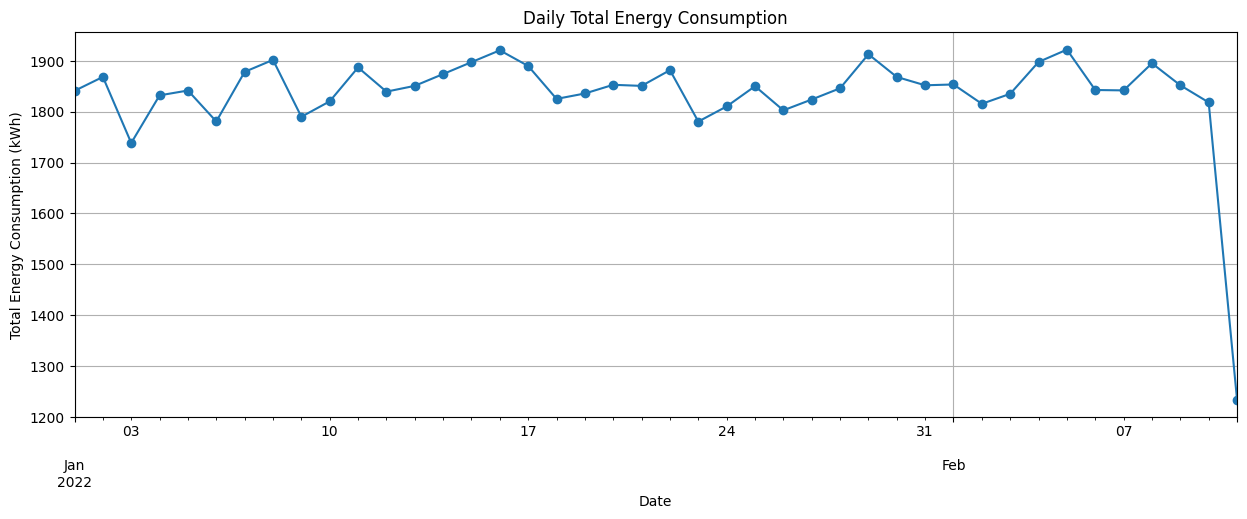

In [17]:
import matplotlib.pyplot as plt

# Resample to daily frequency, summing energy consumption per day
daily_energy = df['EnergyConsumption'].resample('D').sum()

# Plot
plt.figure(figsize=(15, 5))
daily_energy.plot(marker='o', title='Daily Total Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Total Energy Consumption (kWh)')
plt.grid(True)
plt.show()

In [25]:
df["hourly_chg%"] =df.EnergyConsumption.pct_change() *100

In [26]:
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,hourly_chg%
Timestamp,,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,NaN
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,10.664829
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,-6.152102
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,-27.789435
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,25.286482


In [32]:
df[abs(df["hourly_chg%"])> 30]

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,hourly_chg%
Timestamp,,,,,,,,,,,
2022-01-01 14:00:00,26.731525,37.297870,1419.749014,6,Off,Off,12.074223,Friday,Yes,81.183188,35.254550
2022-01-01 21:00:00,21.101112,30.418006,1677.105261,3,Off,Off,14.517204,Sunday,Yes,59.672380,-36.677917
2022-01-02 10:00:00,27.314811,42.936055,1876.510299,4,On,Off,1.181331,Tuesday,Yes,82.504037,37.857362
2022-01-03 06:00:00,29.956879,56.788806,1864.732366,8,On,Off,4.938738,Friday,Yes,91.871965,41.956878
2022-01-03 19:00:00,24.290723,36.987734,1847.395629,6,On,Off,10.955155,Thursday,No,80.192646,33.333879
2022-01-03 21:00:00,20.735716,48.506636,1836.542651,4,Off,On,9.295439,Friday,No,53.263278,-38.226599
2022-01-04 10:00:00,29.645293,42.513606,1417.593259,7,On,On,7.756313,Friday,No,89.088434,37.818378
2022-01-05 13:00:00,27.487556,38.514507,1130.037830,2,Off,On,8.811531,Tuesday,Yes,79.724286,30.415600
2022-01-06 14:00:00,29.458380,56.403450,1724.596154,9,Off,Off,1.399990,Wednesday,No,82.597767,43.687169


In [33]:
df['DayOfWeek'] = df.index.day_name()

In [35]:
df.head(20)

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,hourly_chg%
Timestamp,,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Saturday,No,75.364373,NaN
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,10.664829
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Saturday,No,78.270888,-6.152102
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Saturday,No,56.519850,-27.789435
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Saturday,No,70.811732,25.286482
2022-01-01 05:00:00,29.576037,36.824263,1871.709180,6,Off,Off,17.626690,Saturday,Yes,84.321885,19.078975
2022-01-01 06:00:00,25.131167,35.709622,1607.001228,6,On,Off,24.264702,Saturday,Yes,76.165791,-9.672571
2022-01-01 07:00:00,23.182844,31.679920,1633.955330,8,Off,Off,27.517099,Saturday,Yes,74.131906,-2.670339
2022-01-01 08:00:00,25.391999,46.399364,1240.309224,6,On,Off,2.307595,Saturday,No,78.206236,5.496054


In [36]:
df.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,hourly_chg%
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,999.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873,1.138339
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112,15.382139
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278,-38.226599
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690,-10.390995
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696,-0.256283
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742,11.188293
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120,54.429114


In [37]:
# Summarize missing values only if they exist
missing = df.isnull().sum()
print(missing[missing > 0])

hourly_chg%    1
dtype: int64


In [39]:
missing

Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
hourly_chg%          1
dtype: int64

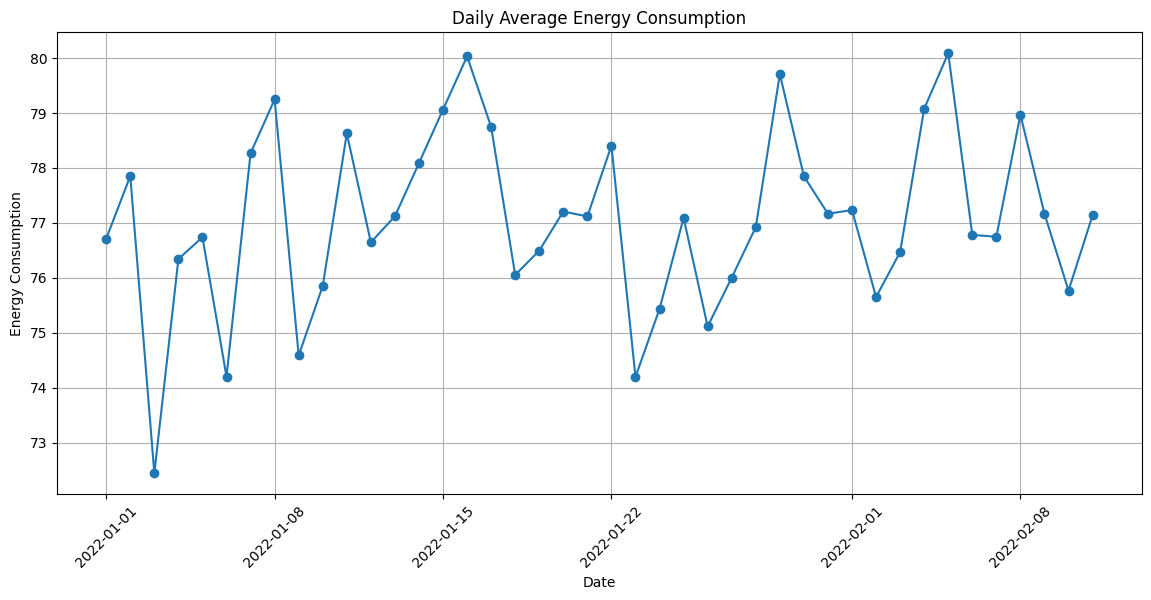

In [40]:
import matplotlib.pyplot as plt

# Step 1: Create a new column just for Date (no time)
df['DateOnly'] = df.index.date

# Step 2: Group by Date and take mean EnergyConsumption
daily_avg = df.groupby('DateOnly')['EnergyConsumption'].mean()

# Step 3: Plot
plt.figure(figsize=(14,6))
daily_avg.plot(kind='line', marker='o')
plt.title('Daily Average Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [41]:
df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,hourly_chg%,DateOnly
Timestamp,,,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Saturday,No,75.364373,NaN,2022-01-01
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,10.664829,2022-01-01
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Saturday,No,78.270888,-6.152102,2022-01-01
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Saturday,No,56.519850,-27.789435,2022-01-01
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Saturday,No,70.811732,25.286482,2022-01-01


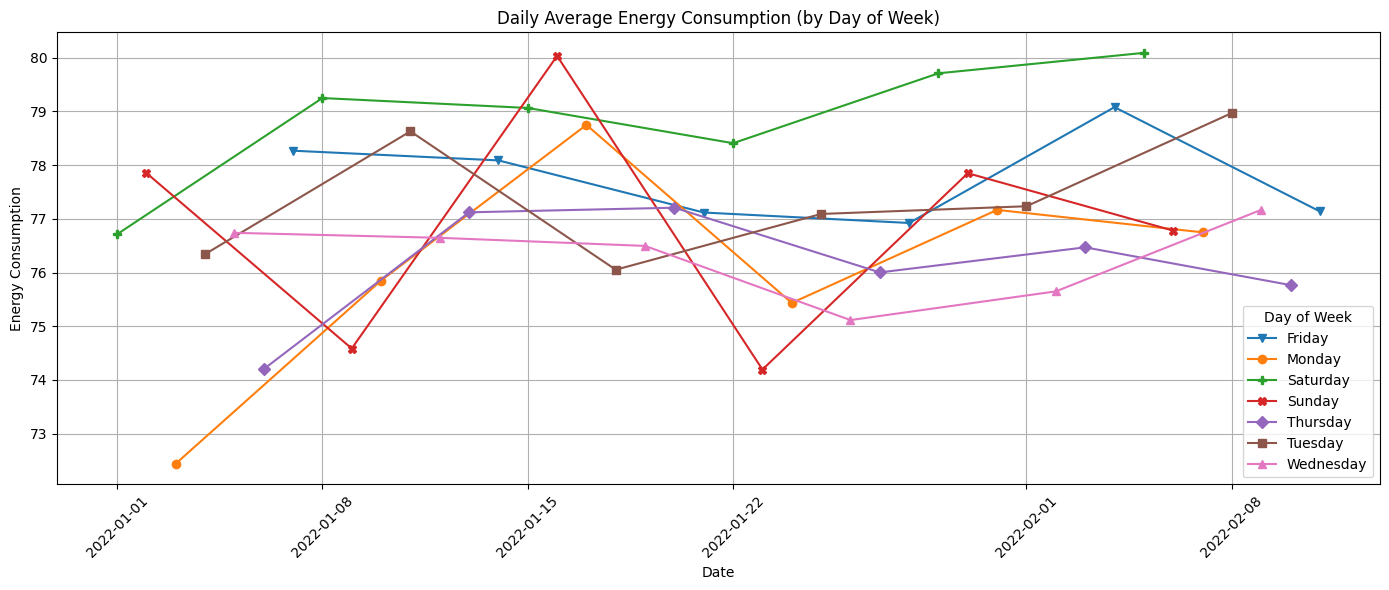

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create DateOnly and DayOfWeek columns
df['DateOnly'] = df.index.date
df['DayOfWeek'] = df.index.day_name()

# Step 2: Group by Date and compute mean EnergyConsumption + DayOfWeek
daily_stats = df.groupby('DateOnly').agg({
    'EnergyConsumption': 'mean',
    'DayOfWeek': lambda x: x.iloc[0]  # Get the first (they're all same per day)
}).reset_index()

# Step 3: Define marker style for each day
day_markers = {
    'Monday': 'o',
    'Tuesday': 's',
    'Wednesday': '^',
    'Thursday': 'D',
    'Friday': 'v',
    'Saturday': 'P',
    'Sunday': 'X'
}

# Step 4: Plot each day separately
plt.figure(figsize=(14,6))
for day, group in daily_stats.groupby('DayOfWeek'):
    plt.plot(group['DateOnly'], group['EnergyConsumption'],
             marker=day_markers.get(day, 'o'),
             label=day)

plt.title('Daily Average Energy Consumption (by Day of Week)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Day of Week')
plt.tight_layout()
plt.show()

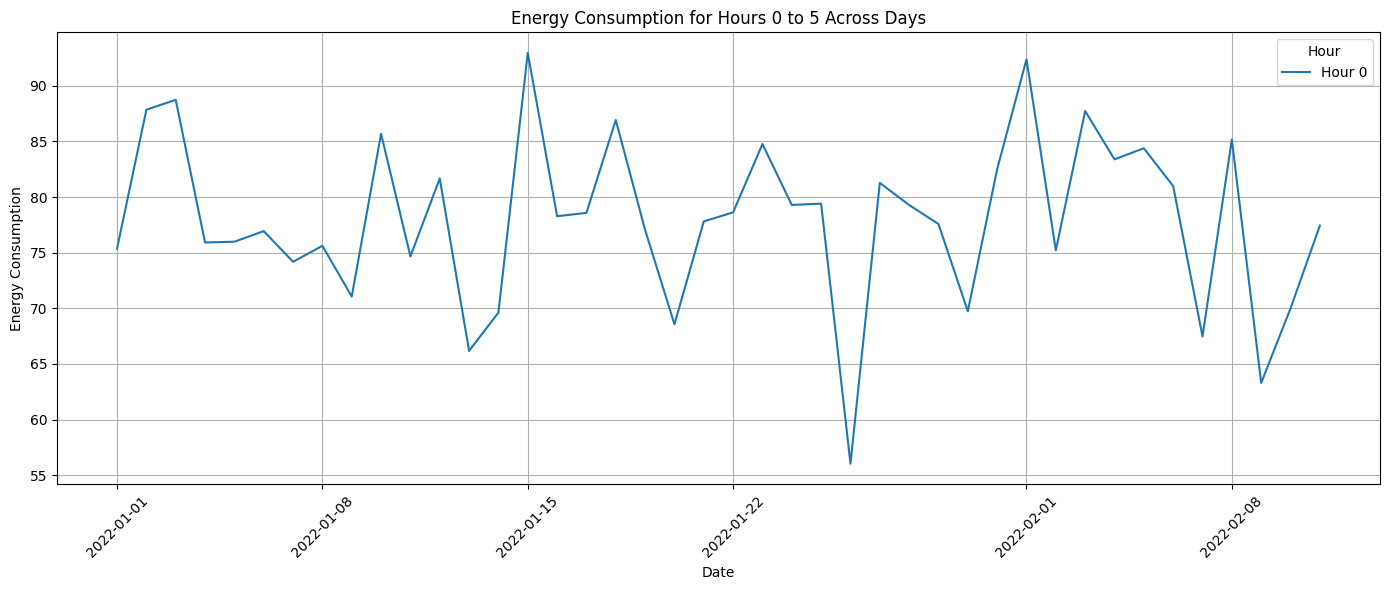

In [44]:
import matplotlib.pyplot as plt

# Step 1: Extract hour and date
df['Hour'] = df.index.hour
df['DateOnly'] = df.index.date

# Step 2: Filter only first 6 hours (0 to 5)
early_hours = df[df['Hour'].isin(range(1))]

# Step 3: Pivot to get each hour as a separate column
pivot_df = early_hours.pivot_table(
    index='DateOnly',
    columns='Hour',
    values='EnergyConsumption',
    aggfunc='mean'
)

# Step 4: Plot
plt.figure(figsize=(14,6))
for hour in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[hour], label=f'Hour {hour}')

plt.title('Energy Consumption for Hours 0 to 5 Across Days')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Hour')
plt.tight_layout()
plt.show()

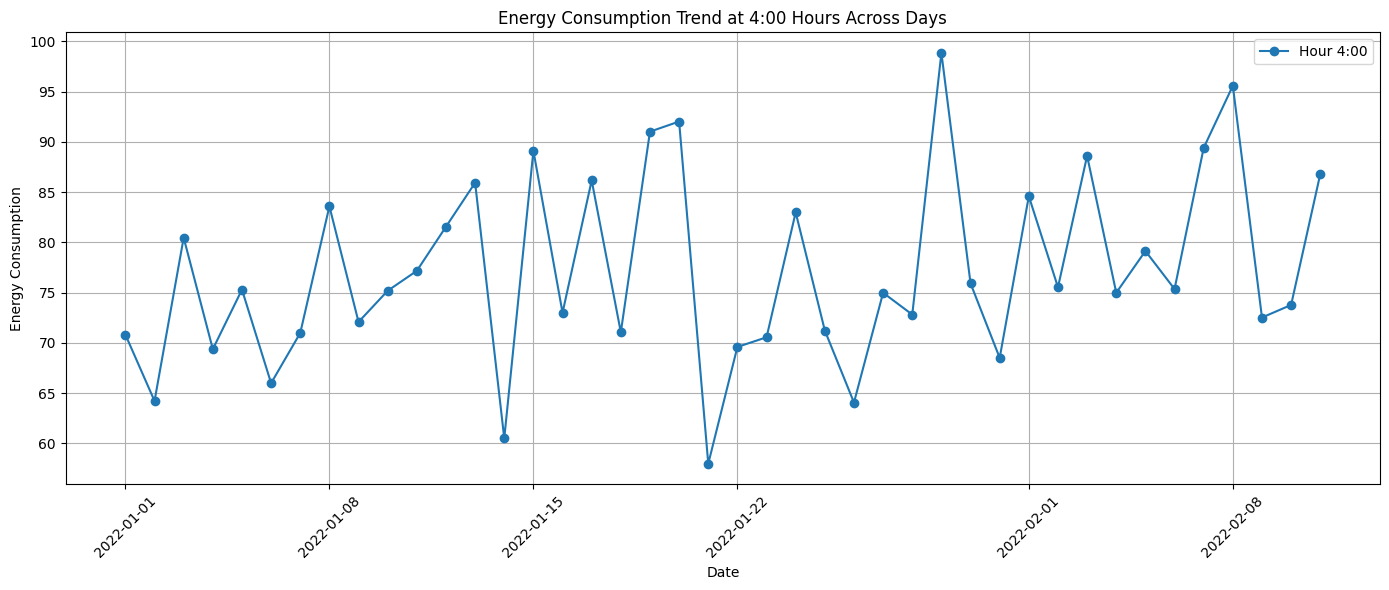

In [49]:
import matplotlib.pyplot as plt

def plot_hourly_trend(selected_hour):
    # Ensure hour column exists
    df['Hour'] = df.index.hour
    df['DateOnly'] = df.index.date

    # Filter for the selected hour
    hourly_data = df[df['Hour'] == selected_hour]

    # Group by date to get EnergyConsumption at that hour
    daily_hourly = hourly_data.groupby('DateOnly')['EnergyConsumption'].mean()

    # Plot
    plt.figure(figsize=(14,6))
    plt.plot(daily_hourly.index, daily_hourly.values, marker='o', label=f'Hour {selected_hour}:00')
    plt.title(f'Energy Consumption Trend at {selected_hour}:00 Hours Across Days')
    plt.xlabel('Date')
    plt.ylabel('Energy Consumption')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage: view chart for 7 AM
plot_hourly_trend(4)